In [2]:
import preliz as pz
from matplotlib import pyplot as plt

In [76]:
%matplotlib widget

In [92]:
plt.gcf().clear()
pz.Beta(1,1).plot_interactive(kind='pdf',xy_lim='auto',interval='hdi',)
#plt.show()

interactive(children=(FloatSlider(value=1.0, description='alpha (0, inf)', max=11.0, min=2.220446049250313e-16…

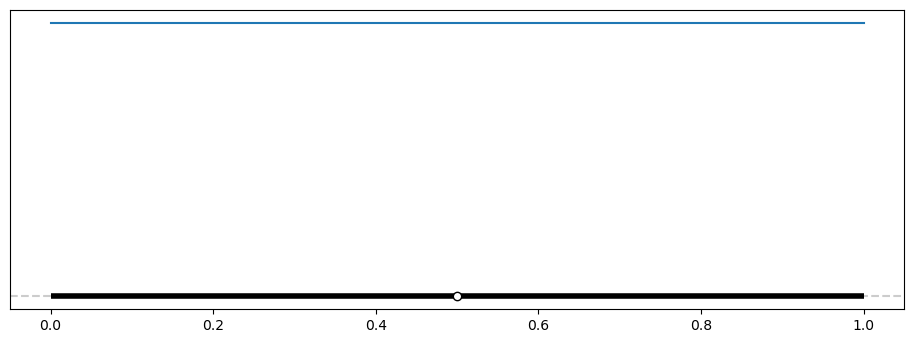

In [93]:
plt.show()

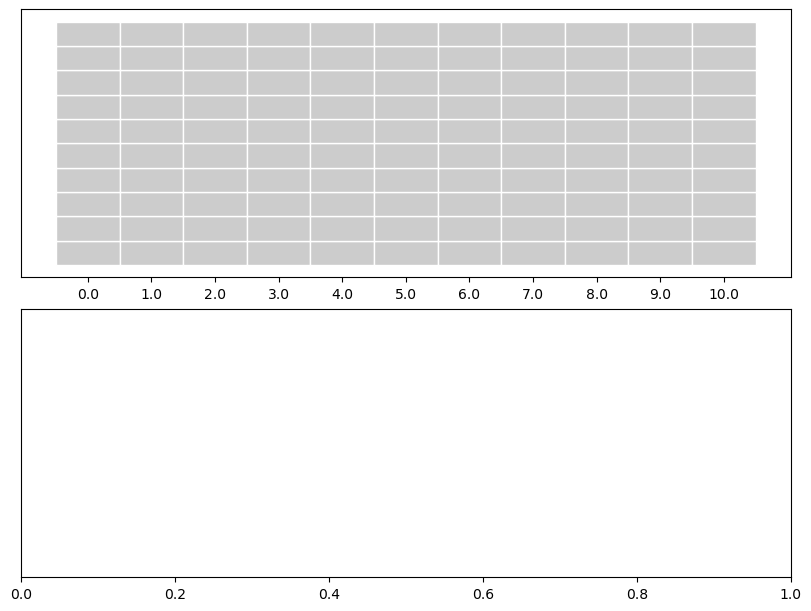

In [4]:
pz.roulette()

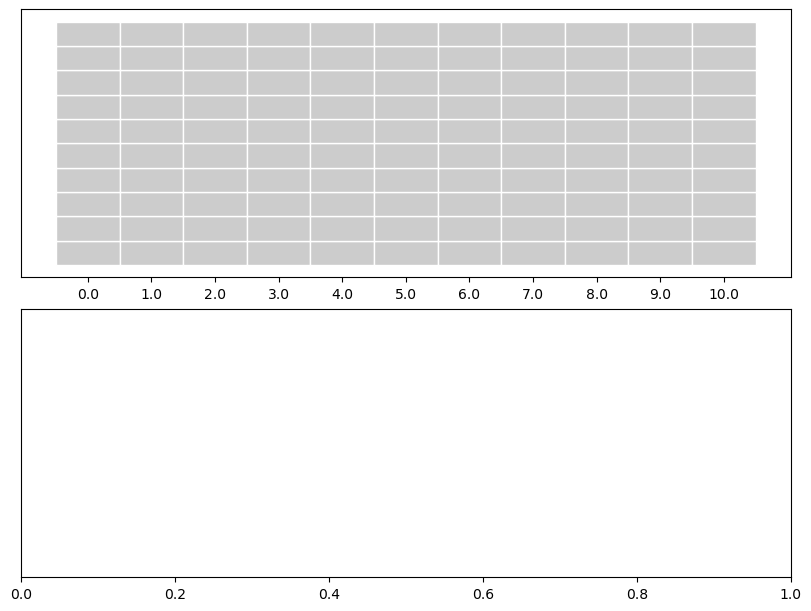

Beta(mean=0.6, median=0.6, std=0.08, lower=0.45, upper=0.74)

In [5]:
prob_frown=pz.Beta(alpha=24, beta=16)
plt.show()
prob_frown.summary()

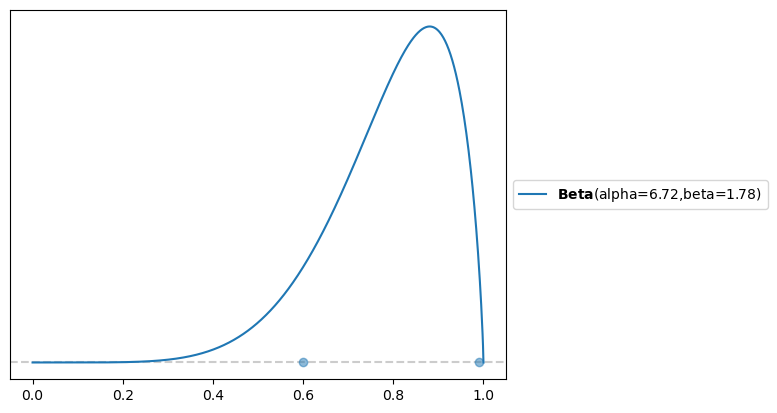

Beta(alpha=6.72,beta=1.78)

In [6]:
plt.close()
prob_smile= pz.Beta()
pz.maxent(prob_smile, lower=.60, upper=.99, mass=.90,);
plt.show()
prob_smile



In [55]:
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import blackjax


In [57]:
import lux

In [8]:

smiles = pm.BetaBinomial.dist(alpha=prob_smile.alpha,beta=prob_smile.beta, n=10, shape=100)
print(smiles.eval())
frowns = pm.BetaBinomial.dist(alpha=prob_frown.alpha, beta=prob_frown.beta, n=10-smiles, shape=100)
print(frowns.eval())

print((smiles+frowns).eval())

[ 7  8  7 10  8  8 10  7  7 10  7  8 10 10  8  5  8  7  7  9  7 10  6  9
 10  9  5  9 10 10  7  9 10  6  8  9  6  5 10  6  8  5  7  7 10  9 10  8
  5  4  7  8  8  7  9 10  8  9  9  8 10  6  9  9  7 10  9  5  8  8  8  5
 10  6  6  7 10 10  6  9  8  9  8  6  8 10  8  5  7  7  9  7 10  7  6  8
  9  5  9  9]
[2 2 1 0 1 0 0 3 2 0 3 2 0 0 2 4 2 1 1 1 2 0 2 1 0 0 2 1 0 0 2 0 0 1 1 1 2
 1 0 2 1 3 2 1 0 1 0 1 4 3 2 1 0 3 0 0 1 0 1 2 0 2 1 1 1 0 1 4 0 1 0 2 0 1
 3 2 0 0 3 1 2 1 2 1 1 0 0 4 2 0 0 2 0 1 2 0 1 4 1 1]
[ 9 10  8 10  9  8 10 10  9 10 10 10 10 10 10  9 10  8  8 10  9 10  8 10
 10  9  7 10 10 10  9  9 10  7  9 10  8  6 10  8  9  8  9  8 10 10 10  9
  9  7  9  9  8 10  9 10  9  9 10 10 10  8 10 10  8 10 10  9  8  9  8  7
 10  7  9  9 10 10  9 10 10 10 10  7  9 10  8  9  9  7  9  9 10  8  8  8
 10  9 10 10]


array([7, 2, 3, 2, 2, 1, 2, 1, 3, 4, 3, 7, 8, 2, 1, 7, 8, 0, 3, 1, 3, 1,
       0, 2, 1, 2, 1, 2, 0, 7, 7, 9, 1, 3, 3, 0, 4, 1, 4, 5, 1, 2, 0, 3,
       9, 2, 5, 9, 6, 2, 0, 8, 1, 3, 3, 0, 3, 7, 3, 5, 2, 1, 5, 1, 8, 3,
       4, 9, 6, 0, 1, 2, 3, 2, 6, 2, 1, 0, 7, 4, 0, 1, 2, 5, 4, 0, 1, 5,
       7, 4, 3, 2, 6, 4, 8, 4, 4, 6, 5, 0])

In [68]:



# FILEPATH: /home/wmbelk74/repositories/wmbelk-git/preliz_try.ipynb
datetime = pd.to_datetime((np.arange(0, 100) * 10) + 222, unit='s')  # Convert seconds to datetime

lat_seed = np.linspace(-90, 90, 1)  # example latitude values
lon_seed = np.linspace(-180, 180, 1)  # example longitude values
altitude_seed = np.linspace(0, 1000, 1)  # example altitude values
coord_stack=[lat_seed,lon_seed,altitude_seed]
# Generate random differences between each successive data point
differences = np.random.rand(100,3)

# Calculate the cumulative sum of the differences to get the final values
coord_add_values = np.cumsum(differences, axis=0)
coord_stack+=coord_add_values.T
(lat,lon,altitude)=coord_stack

butterfly_flight = xr.DataArray(
    np.array([smiles.eval(),frowns.eval()]),  # example random data with differences
    dims=['expression', "time", ],
    coords={'expression': ["smiles","frowns"],"time": datetime, "lat": ('time', lat), "lon": ('time',lon), "altitude": ('time',altitude)},
)
butterfly_flight

<xarray.DataArray (expression: 2, time: 100)>
array([[ 7,  2,  3,  2,  2,  1,  2,  1,  3,  4,  3,  7,  8,  2,  1,  7,
         8,  0,  3,  1,  3,  1,  0,  2,  1,  2,  1,  2,  0,  7,  7,  9,
         1,  3,  3,  0,  4,  1,  4,  5,  1,  2,  0,  3,  9,  2,  5,  9,
         6,  2,  0,  8,  1,  3,  3,  0,  3,  7,  3,  5,  2,  1,  5,  1,
         8,  3,  4,  9,  6,  0,  1,  2,  3,  2,  6,  2,  1,  0,  7,  4,
         0,  1,  2,  5,  4,  0,  1,  5,  7,  4,  3,  2,  6,  4,  8,  4,
         4,  6,  5,  0],
       [ 8,  8,  9,  8,  8,  7,  8,  9,  9,  9,  8,  7, 10,  9, 10, 10,
        10, 10, 10,  8,  9,  9,  9,  8,  6, 10, 10,  9,  9, 10,  9,  8,
         9,  8,  9,  9,  9,  9,  9,  9,  9,  7, 10,  9,  9,  8,  9,  5,
         7,  9,  6,  9,  6, 10,  9, 10,  8,  9,  9,  9,  8, 10,  7,  9,
        10,  8,  9, 10,  9,  7,  9,  9,  9,  8,  5,  8, 10,  8,  8,  9,
        10,  9,  9, 10, 10,  7,  8,  8, 10,  7, 10,  8, 10,  8,  9,  8,
         9,  8, 10,  9]])
Coordinates:
  * expression  (expression) <U6 'smiles' 'frowns'
  * time        (time) datetime64[ns] 1970-01-01T00:03:42 ... 1970-01-01T00:2...
    lat         (time) float64 -89.0 -88.54 -87.54 ... -38.34 -37.59 -37.24
    lon         (time) float64 -179.4 -179.2 -179.1 ... -128.7 -128.2 -127.6
    altitude    (time) float64 0.3062 0.8835 1.188 2.0 ... 50.14 50.2 50.46

In [54]:

def convert_coords_to_pymc(dataset):
    return {i:ii.values for (i,ii) in dataset.coords.items() if isinstance(ii, xr.DataArray)}

# Example usage:
pymc_coords = convert_coords_to_pymc(butterfly_flight)



In [51]:
with pm.Model(coords=convert_coords_to_pymc(butterfly_flight)) as dim_import_test:
    data_smiles = pm.Data('smiles_obs',butterfly_flight['expression'=='smiles'],mutable=True,infer_dims_and_coords=True, dims='time')
    data_frowns = pm.Data('frowns_obs',butterfly_flight['expression'=='frowns'],mutable=True,infer_dims_and_coords=True, dims='time')
    smile_alpha = pm.HalfCauchy('smile_alpha', beta=prob_smile.alpha)
    smile_beta = pm.HalfCauchy('smile_beta', beta=prob_smile.beta)
    frown_alpha = pm.HalfCauchy('frown_alpha', beta=prob_frown.alpha)
    frown_beta = pm.HalfCauchy('frown_beta', beta=prob_frown.beta)


    smiles = pm.BetaBinomial('smiles', alpha=smile_alpha, beta=smile_beta, n=10, observed=data_smiles, dims='time')
    frowns = pm.BetaBinomial('frowns', alpha=frown_alpha, beta=frown_beta, n=10, observed=data_frowns, dims='time')

    trace = pm.sample(1000, tune=1000, cores=1, chains=1, return_inferencedata=True,nuts_sampler='blackjax')

    


Compiling...
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/pymc/sampling/jax.py:454: UserWarning: BlackJax currently only display progress bar correctly under `chain_method == 'vectorized'`. Setting `progressbar=False`.
  warnings.warn(
Compilation time = 0:00:00.477354
Sampling...
Sampling time = 0:00:06.445827
Transforming variables...
Transformation time = 0:00:00.070265


In [52]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [67]:
butterfly_flight.to_dataframe(name='smiles'
                                                ).reset_index()


/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:555: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:574: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:462: UserWarning:
Lux detects that the attribute 'time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()